In [1]:
import sklearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ML_dataset.csv')
df.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1158,1158,61751,Female,Loyal Customer,15,Personal Travel,Eco,1608,4,5,...,2,3,4,4,5,4,2,0,0.0,satisfied
7059,7059,115081,Male,disloyal Customer,43,Business travel,Business,358,2,2,...,5,1,5,4,3,3,5,0,0.0,neutral or dissatisfied
21478,21478,83063,Female,Loyal Customer,54,Business travel,Business,957,1,1,...,5,5,5,5,5,5,3,10,12.0,satisfied
13205,13205,6193,Male,Loyal Customer,53,Business travel,Business,3514,1,1,...,3,3,3,3,5,3,4,0,15.0,satisfied
665,665,43842,Male,disloyal Customer,27,Business travel,Eco,174,3,5,...,4,1,2,3,2,1,4,0,0.0,neutral or dissatisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [4]:
df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


<AxesSubplot:>

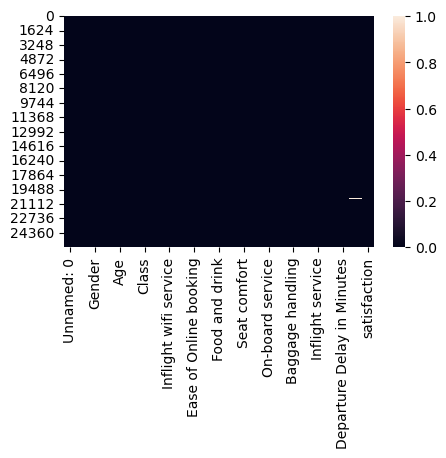

In [5]:
plt.subplots(figsize = (5,3))
sns.heatmap(df.isna())

In [6]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean()) 
# Another way
# df.bmi = df.bmi.fillna(df.bmi.mean())

<AxesSubplot:>

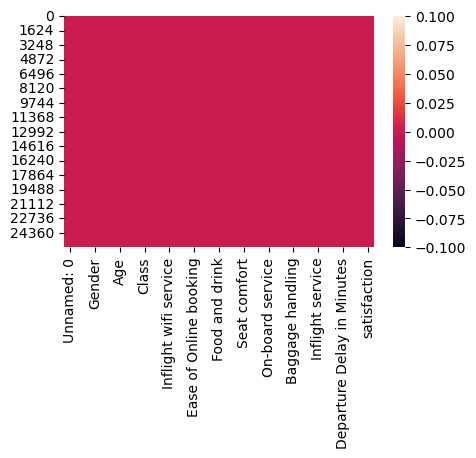

In [7]:
plt.subplots(figsize = (5,3))
sns.heatmap(df.isna())

In [8]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [9]:
df['Customer Type'].value_counts()

Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64

In [10]:
df['Type of Travel'].value_counts()

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64

In [11]:
df['Class'].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

In [12]:
df['satisfaction'].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [13]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [14]:
df['Gender'].replace({'Male': 1},inplace =True)
df['Gender'].replace({'Female': 0},inplace =True)

In [15]:
df['Customer Type'].replace({'Loyal Customer': 1},inplace =True)
df['Customer Type'].replace({'disloyal Customer': 0},inplace =True)

In [16]:
df['Type of Travel'].replace({'Personal Travel': 1},inplace =True)
df['Type of Travel'].replace({'Business travel': 0},inplace =True)

In [17]:
df['Class'].replace({'Business': 0},inplace =True)
df['Class'].replace({'Eco': 1},inplace =True)
df['Class'].replace({'Eco Plus': 2},inplace =True)

In [18]:
df['satisfaction'].replace({'satisfied': 1},inplace =True)
df['satisfaction'].replace({'neutral or dissatisfied': 0},inplace =True)
df.rename(columns={'satisfaction':'Satisfied'},inplace=True)

In [19]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfied
0,0,1,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,1,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,0,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,1,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,0,34,0,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
25972,1,1,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,0,1,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,1,1,14,0,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


#### Exploratory Data Analysis

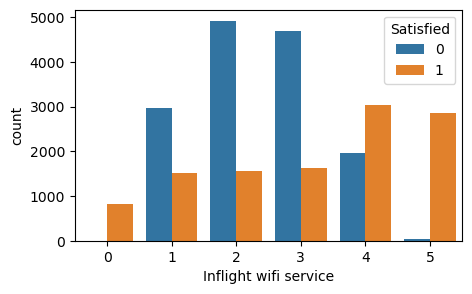

In [20]:
plt.subplots(figsize = (5,3))
sns.countplot(x = 'Inflight wifi service', hue = 'Satisfied', data = df)
plt.show()

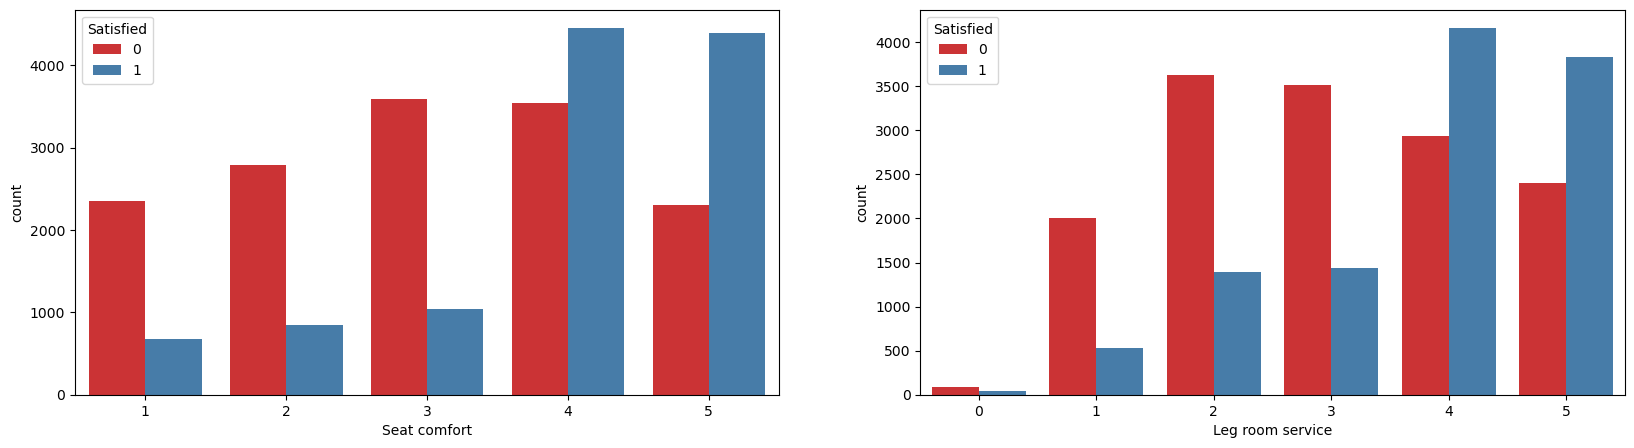

In [21]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'Satisfied', palette = "Set1", data = df,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'Satisfied', palette = "Set1", data = df, ax = ax[1])
plt.show()

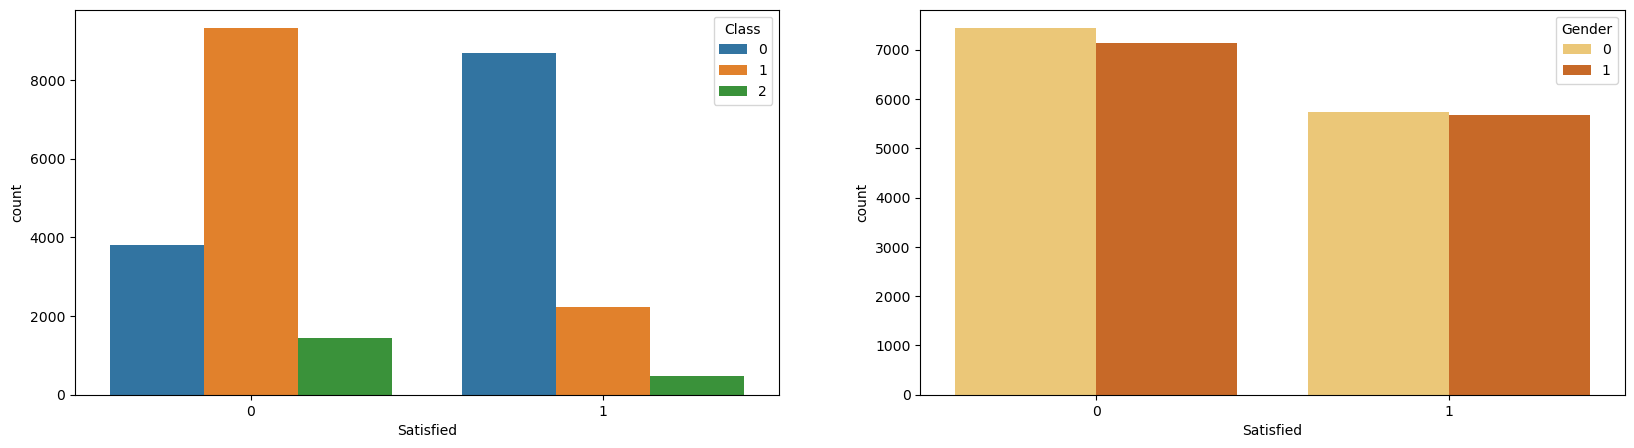

In [22]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Satisfied',data=df,hue='Class',ax = ax[0])
sns.countplot(x = 'Satisfied',data=df,hue='Gender',palette="YlOrBr",ax = ax[1]) 
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

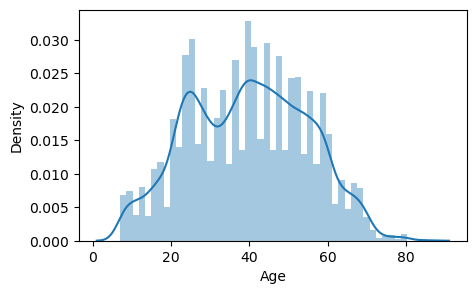

In [23]:
plt.subplots(figsize = (5,3))
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

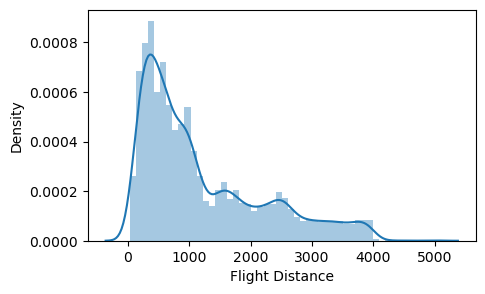

In [24]:
plt.subplots(figsize = (5,3))
sns.distplot(df['Flight Distance'])

## Building Our Model
####  Train / Test Split Data

In [25]:
X = df.drop('Satisfied',axis=1)
y = df['Satisfied']

# spliting dataset into X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training and Predicting 
##### ■ Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
LogR_model = LogisticRegression(max_iter=5000)  # Model Building

LogR_fitting = LogR_model.fit(X_train,y_train)  # Model Training
LogR_y_pred = LogR_model.predict(X_test)  # Model Prediction 

# Display Fitting Process
print(LogR_fitting)

LogisticRegression(max_iter=5000)


In [27]:
print('Logistic Regression training score: ',LogR_model.score(X_train,y_train))
print('Logistic Regression testing score: ',LogR_model.score(X_test,y_test))

Logistic Regression training score:  0.872521655437921
Logistic Regression testing score:  0.8652809853733642


In [28]:
# Model Evaluation
# Accuracy... 
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,LogR_y_pred)

array([[2629,  316],
       [ 384, 1867]], dtype=int64)

In [29]:
print(classification_report(y_test,LogR_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2945
           1       0.86      0.83      0.84      2251

    accuracy                           0.87      5196
   macro avg       0.86      0.86      0.86      5196
weighted avg       0.87      0.87      0.87      5196



In [30]:
# Error Rate...
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
mean_abs_err  =  mean_absolute_error(y_test,LogR_y_pred)
mean_sq_err = mean_squared_error(y_test,LogR_y_pred) 
median_abs_err = median_absolute_error(y_test,LogR_y_pred) 
print("The Mean Absolute Error: ",mean_abs_err)
print("The Mean Squared Error: ",mean_sq_err)
print("The Median Absolute Error: ",median_abs_err)

The Mean Absolute Error:  0.13471901462663588
The Mean Squared Error:  0.13471901462663588
The Median Absolute Error:  0.0


#### ■ Naive Bayes 

In [31]:
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB(alpha=1.0,binarize=1.0)  # Model Building  

NB_fitting = NB_model.fit(X_train,y_train)   # Model Training
NB_y_pred = NB_model.predict(X_test)  # Model Prediction

# Display Fitting Process
print(NB_fitting)

BernoulliNB(binarize=1.0)


In [32]:
print('Naive Bayes training score: ',NB_model.score(X_train,y_train))
print('Naive Bayes testing score: ',NB_model.score(X_test,y_test))

Naive Bayes training score:  0.6453801732435034
Naive Bayes testing score:  0.6345265588914549


In [33]:
# Model Evaluation
# Accuracy...
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,NB_y_pred)

array([[1581, 1364],
       [ 535, 1716]], dtype=int64)

In [34]:
print(classification_report(y_test,NB_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.54      0.62      2945
           1       0.56      0.76      0.64      2251

    accuracy                           0.63      5196
   macro avg       0.65      0.65      0.63      5196
weighted avg       0.66      0.63      0.63      5196



In [35]:
# Error Rate...
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
mean_abs_err  =  mean_absolute_error(y_test,NB_y_pred)
mean_sq_err = mean_squared_error(y_test,NB_y_pred) 
median_abs_err = median_absolute_error(y_test,NB_y_pred)
print("The Mean Absolute Error: ",mean_abs_err)
print("The Mean Squared Error: ",mean_sq_err)
print("The Median Absolute Error: ",median_abs_err)

The Mean Absolute Error:  0.365473441108545
The Mean Squared Error:  0.365473441108545
The Median Absolute Error:  0.0


#### ■ Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)

DT_fitting = DT_model.fit(X_train,y_train)
DT_y_pred = DT_model.predict(X_test)

# Display Fitting Process
print(DT_fitting)

DecisionTreeClassifier(max_depth=3, random_state=33)


In [37]:
print('Naive Bayes training score: ',DT_model.score(X_train,y_train))
print('Naive Bayes testing score: ',DT_model.score(X_test,y_test))

Naive Bayes training score:  0.8854186717998075
Naive Bayes testing score:  0.8775981524249422


In [38]:
# Model Evaluation
# Accuracy...
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,DT_y_pred)

array([[2520,  425],
       [ 211, 2040]], dtype=int64)

In [39]:
print(classification_report(y_test,DT_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2945
           1       0.83      0.91      0.87      2251

    accuracy                           0.88      5196
   macro avg       0.88      0.88      0.88      5196
weighted avg       0.88      0.88      0.88      5196



In [40]:
# Error Rate...
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
mean_abs_err  =  mean_absolute_error(y_test,DT_y_pred)
mean_sq_err = mean_squared_error(y_test,DT_y_pred) 
median_abs_err = median_absolute_error(y_test,DT_y_pred)
print("The Mean Absolute Error: ",mean_abs_err)
print("The Mean Squared Error: ",mean_sq_err)
print("The Median Absolute Error: ",median_abs_err)

The Mean Absolute Error:  0.12240184757505773
The Mean Squared Error:  0.12240184757505773
The Median Absolute Error:  0.0


#### ■ Random Forest 

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=33)

RF_model.fit(X_train,y_train)
RF_y_pred = RF_model.predict(X_test)


In [42]:
print('RandomForestClassifier training score: ',RF_model.score(X_train,y_train))
print('RandomForestClassifier testing score: ',RF_model.score(X_test,y_test))

RandomForestClassifier training score:  0.8986044273339749
RandomForestClassifier testing score:  0.8901077752117013


In [43]:
# Model Evaluation
# Accuracy...
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,RF_y_pred)

array([[2741,  204],
       [ 367, 1884]], dtype=int64)

In [44]:
print(classification_report(y_test,RF_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2945
           1       0.90      0.84      0.87      2251

    accuracy                           0.89      5196
   macro avg       0.89      0.88      0.89      5196
weighted avg       0.89      0.89      0.89      5196



In [45]:
# Error Rate...
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
mean_abs_err  =  mean_absolute_error(y_test,RF_y_pred)
mean_sq_err = mean_squared_error(y_test,RF_y_pred) 
median_abs_err = median_absolute_error(y_test,RF_y_pred)
print("The Mean Absolute Error: ",mean_abs_err)
print("The Mean Squared Error: ",mean_sq_err)
print("The Median Absolute Error: ",median_abs_err)

The Mean Absolute Error:  0.10989222478829869
The Mean Squared Error:  0.10989222478829869
The Median Absolute Error:  0.0
